In [1]:
import json
import csv
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
import string
import re

C:\Users\palak\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


# Converting review Json to pandas dataframe

In [4]:
question_pd = pd.read_csv("Questions.csv",encoding="latin-1")

In [5]:
question_pd.shape

(1264216, 7)

In [6]:
tags_pd = pd.read_csv("Tags.csv",encoding="latin-1")

In [7]:
tags_pd.shape

(3750994, 2)

In [8]:
question_pd[:5]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [9]:
tags_pd[:5]

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [10]:
tags_pd = tags_pd.dropna(how='any',axis=0) #drop any null value row

In [11]:
tags_pd.Tag = tags_pd.Tag.apply(lambda x: x.lower()) #convert text to lower case

In [12]:
tags_pd.shape

(3749881, 2)

In [13]:
len(tags_pd['Tag'].unique().tolist()) #how many unique tags

37034

In [14]:
tags_pd['count'] = tags_pd.groupby('Tag')['Tag'].transform('count')

In [15]:
tags_pd[:5]

,Id,Tag,count
0,80,flex,2430
1,80,actionscript-3,4039
2,80,air,738
3,90,svn,2361
4,90,tortoisesvn,441


In [16]:
import matplotlib
%matplotlib inline

In [17]:
tags_pd['Tag'].value_counts()

javascript                   124155
java                         115212
c#                           101186
php                           98808
android                       90659
jquery                        78542
python                        64601
html                          58976
c++                           47591
ios                           47009
mysql                         42464
css                           42308
sql                           35782
asp.net                       29970
objective-c                   26922
ruby-on-rails                 25789
.net                          24059
c                             23238
iphone                        21539
angularjs                     20345
arrays                        19799
sql-server                    18160
json                          17669
ruby                          17013
r                             15701
ajax                          15629
regex                         15349
xml                         

In [18]:
tags_pd['Tag'].value_counts()[:10]

javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: Tag, dtype: int64

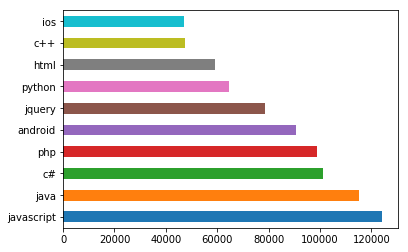

In [19]:
tags_pd['Tag'].value_counts()[:10].plot(kind='barh')

In [20]:
top10_df = tags_pd['Tag'].value_counts()[:10].reset_index()

In [21]:
top10_df.shape

(10, 2)

In [22]:
top10_list = top10_df['index'].tolist()

In [23]:
tags_pd_final = tags_pd[tags_pd['Tag'].isin(top10_list)] #filtering dataframe based on top20 popular tags

In [24]:
tags_pd_final.shape

(826739, 3)

In [25]:
len(tags_pd_final['Tag'].unique().tolist()) #making sure unique tags are 10

10

In [26]:
question_pd_1 = question_pd.drop(question_pd.columns[[2,3,4]],axis=1)

In [27]:
question_pd_1.shape

(1264216, 4)

# preprocessing of Title and Body

In [28]:
question_pd_1.Title = question_pd_1.Title.apply(lambda x: x.lower())
question_pd_1.Body = question_pd_1.Body.apply(lambda x: x.lower())

In [29]:
question_pd_1.Body = question_pd_1.Body.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [30]:
question_pd_1.Title = question_pd_1.Title.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [31]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [32]:
question_pd_1['Text'] = question_pd_1['Body'].apply(cleanhtml) #removing html tags

In [33]:
question_pd_1['Title'] = question_pd_1['Title'].apply(cleanhtml) #removing html tags

In [34]:
question_pd_1['Text'] = question_pd_1['Text'].str.replace('[^\w\s]',' ') #removing punctuation marks --> 1 min 

In [35]:
question_pd_1['Title'] = question_pd_1['Title'].str.replace('[^\w\s]',' ') #removing punctuation marks

In [36]:
question_pd_1['Text'] = question_pd_1['Text'].str.replace('\d+', '')   #removing digits
question_pd_1['Title'] = question_pd_1['Title'].str.replace('\d+', '') #removing digits

In [37]:
def singlespace(text):
    return ' '.join(text.split())


In [38]:
question_pd_1['Text'] = question_pd_1['Text'].apply(singlespace)

In [39]:
question_pd_1['Title'] = question_pd_1['Title'].apply(singlespace)

In [40]:
question_pd_1['Text'][0]

'i ve written a database generation script in sql and want to execute it in my adobe air application create table trole roleid integer primary key rolename varchar create table tfile fileid integer primary key filename varchar filedescription varchar thumbnailid integer fileformatid integer categoryid integer isfavorite boolean dateadded date globalaccesscount integer lastaccesstime date downloadcomplete boolean isnew boolean isspotlight boolean duration varchar create table tcategory categoryid integer primary key categoryname varchar parent_categoryid integer i execute this in adobe air using the following methods public static function runsqlfromfile filename string void var file file file applicationdirectory resolvepath filename var stream filestream new filestream stream open file filemode read var strsql string stream readutfbytes stream bytesavailable nonquery strsql public static function nonquery strsql string void var sqlconnection sqlconnection new sqlconnection sqlconnecti

In [41]:
question_pd_1['Title'][0]

'sqlstatement execute multiple queries in one statement'

In [42]:
question_pd_1.shape

(1264216, 5)

In [43]:
tags_pd_final.shape

(826739, 3)

In [44]:
tags_pd_final[:5]

,Id,Tag,count
14,260,c#,101186
18,330,c++,47591
28,650,c#,101186
35,930,c#,101186
39,1010,c#,101186


In [45]:
tags_pd['Id'].value_counts()[:10]

36444300    5
12984310    5
37649730    5
36079950    5
36907250    5
16583980    5
37335040    5
36202910    5
20150520    5
3276520     5
Name: Id, dtype: int64

In [46]:
tags_pd_final_1 = tags_pd_final[tags_pd_final.duplicated(['Id'],keep = 'first')] #just taking one tag for each Id

In [47]:
tags_pd_final_1[:5]

,Id,Tag,count
312,11060,python,64601
367,12870,php,98808
647,23370,c++,47591
982,33080,html,58976
1030,34120,html,58976


In [48]:
tags_pd_final_2 = tags_pd_final_1.drop(tags_pd_final_1.columns[[2]],axis=1)

In [49]:
tags_pd_final_2.shape

(120403, 2)

In [50]:
question_pd_1.shape

(1264216, 5)

In [51]:
question_pd_1[:5]

,Id,OwnerUserId,Title,Body,Text
0,80,26.0,sqlstatement execute multiple queries in one s...,<p>i've written a database generation script i...,i ve written a database generation script in s...
1,90,58.0,good branching and merging tutorials for torto...,<p>are there any really good tutorials explain...,are there any really good tutorials explaining...
2,120,83.0,asp net site maps,<p>has anyone got experience creating <strong>...,has anyone got experience creating sql based a...
3,180,2089740.0,function for creating color wheels,<p>this is something i've pseudo-solved many t...,this is something i ve pseudo solved many time...
4,260,91.0,adding scripting functionality to net applicat...,<p>i have a little game written in c#. it uses...,i have a little game written in c it uses a da...


In [52]:
question_pd_2 = question_pd_1.drop(question_pd_1.columns[[1,3]],axis=1)

In [53]:
question_pd_2.shape

(1264216, 3)

# Combining dataframes

In [54]:
merged_df = pd.merge(question_pd_2, tags_pd_final_2, on='Id')

In [55]:
merged_df.shape

(120403, 4)

In [56]:
merged_df[:5]

,Id,Title,Text,Tag
0,11060,how should i unit test a code generator,this is a difficult and open ended question i ...,python
1,12870,arrays of arrays in java,this is a nasty one for me i m a php guy worki...,php
2,23370,notification of drop in drag drop in windows,my c program has a list of files that can be d...,c++
3,33080,setting the height of a div dynamically,in a web application i have a page that contai...,html
4,34120,html scraping in php,i ve been doing some html scraping in php usin...,html


# Tokenization 
## Convert words into bag of words, Assign unique number to each word 
## Word embedding

In [57]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [58]:
stop_words = stopwords.words('english')
porter = PorterStemmer()

In [59]:
#remove stop words  2 mins
merged_df['Text']=merged_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [60]:
#remove stop words 
merged_df['Title']=merged_df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [61]:
#stemming of words
merged_df['Title']=merged_df['Title'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [62]:
#stemming of words 10 mins
merged_df['Text']=merged_df['Text'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [63]:
merged_df[:5]

,Id,Title,Text,Tag
0,11060,unit test code gener,difficult open end question know thought throw...,python
1,12870,array array java,nasti one php guy work java jsp project know a...,php
2,23370,notif drop drag drop window,c program list file drag drop anoth program re...,c++
3,33080,set height div dynam,web applic page contain div auto width depend ...,html
4,34120,html scrape php,html scrape php use regular express work resul...,html


In [64]:
titleList = merged_df['Title'].tolist()

In [65]:
len(titleList)

120403

In [66]:
textList = merged_df['Text'].tolist()

In [67]:
len(textList)

120403

In [68]:
token_object = Tokenizer(num_words=10000)

In [69]:
token_object.fit_on_texts(merged_df['Text'].values)
sequences = token_object.texts_to_sequences(merged_df['Text'].values)
total_word_index = token_object.word_index
print('Found %s unique tokens.' % len(total_word_index))


Found 344539 unique tokens.


In [70]:
from keras.preprocessing.sequence import pad_sequences #Pad length of text/question
X = pad_sequences(sequences, maxlen=250)
X.shape

(120403, 250)

# Making output vector ready

In [71]:
tagList = merged_df['Tag'].tolist()

In [72]:
tagList = np.array(tagList)

In [73]:
type(tagList)

numpy.ndarray

In [74]:
tagList.shape

(120403,)

In [75]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
normalized_y=lb.fit_transform(tagList)
lb.classes_

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype='<U10')

In [76]:
normalized_y[:10]

array([9, 8, 2, 3, 3, 7, 9, 5, 7, 3], dtype=int64)

In [77]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [78]:
# columns
columns_new = ['normalized_y']

# pass in array and columns
df_y = pd.DataFrame(normalized_y , columns=columns_new)

In [79]:
encode_text_dummy(df_y,'normalized_y')

In [80]:
df_y[:5]

,normalized_y-0,normalized_y-1,normalized_y-2,normalized_y-3,normalized_y-4,normalized_y-5,normalized_y-6,normalized_y-7,normalized_y-8,normalized_y-9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [81]:
df_encoded = df_y.values

In [82]:
df_encoded.shape

(120403, 10)

In [83]:
df_encoded[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

# Train test split

In [84]:
from sklearn.model_selection import train_test_split
X_train_sk,X_test_sk,y_train_sk,y_test_sk = train_test_split(X,normalized_y,test_size=0.20,random_state=1)

# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train_sk[:5000],y_train_sk[:5000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [86]:
from sklearn import metrics

In [87]:
y_pred = clf_knn.predict(X_test_sk[:5000])

print("test", y_test_sk[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test_sk[:5000],y_pred))
print("Precision Score:: ",metrics.precision_score(y_test_sk[:5000],y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_sk[:5000],y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_sk[:5000],y_pred,average='weighted'))

test [7 0 1 7 3 3 3 3 3 5]
pred [3 7 3 0 3 7 7 3 3 7]
[[109   0   0 283   0   0   2 370   3   0]
 [  9   0   0  19   0   0   0  15   0   0]
 [ 13   0   0  25   0   0   0  36   0   0]
 [ 86   0   0 526   1   0   3 864   0   0]
 [ 19   0   0  39   0   0   0  69   0   0]
 [  4   0   0  13   0   0   0  21   0   0]
 [ 13   0   0  75   0   0   0 122   0   0]
 [145   0   1 837   4   0   5 934   1   1]
 [ 19   0   1  85   0   0   0 145   0   0]
 [ 14   0   0  39   0   0   0  30   0   0]]
Precision Score::  0.2572096785816403
Recall Score::  0.3138
F1 Score::  0.27780438723400447


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train_sk, y_train_sk)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
y_pred = clf_lr.predict(X_test_sk)

print("test", y_test_sk[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test_sk,y_pred))
print("Precision Score:: ",metrics.precision_score(y_test_sk,y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_sk,y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_sk,y_pred,average='weighted'))

test [7 0 1 7 3 3 3 3 3 5]
pred [7 7 7 7 3 3 7 7 7 7]
[[ 753    0    0  178    0    1    0 2787    0    1]
 [  23    0    0   11    0    0    0  147    0    0]
 [  86    0    0    5    0    0    0  357    0    0]
 [ 287    1    1  458    4    1    0 6372    0    2]
 [  70    0    0   11    0    0    0  504    0    0]
 [  21    0    0    3    0    0    0  137    0    0]
 [  57    0    0   45    0    0    0  919    0    0]
 [ 448    1    2  515    3    0    0 8278    0    1]
 [  84    0    0  102    0    0    0 1072    0    0]
 [  43    0    0   10    0    0    0  280    0    0]]
Precision Score::  0.3158822942141768
Recall Score::  0.39404509779494207
F1 Score::  0.28485450316176036


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,df_encoded,test_size=0.20,random_state=1)

In [91]:
X_train.shape
y_train.shape

(96322, 10)

In [92]:
X_test.shape
y_test.shape

(24081, 10)

# Neural Network Model
### With layers.embedding 

In [93]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [94]:
from keras.models import  Sequential
from keras.layers import Dense

In [95]:
checkpointer = ModelCheckpoint(filepath="best_weights_NN_we_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(layers.Embedding(input_dim=344539, 
                                              output_dim=100, 
                                              input_length=250))
    model_classification.add(layers.Flatten()) #important
    model_classification.add(Dense(60, activation='relu')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train[:5000], y_train[:5000],validation_data=(X_test[:1000],y_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 72s - loss: 1.3672 - val_loss: 1.2198
Epoch 2/1000
 - 73s - loss: 0.8919 - val_loss: 1.2361
Epoch 3/1000
 - 72s - loss: 0.3981 - val_loss: 1.4146
Epoch 4/1000
 - 72s - loss: 0.1396 - val_loss: 1.5238
Epoch 5/1000
 - 73s - loss: 0.0725 - val_loss: 1.6638
Epoch 6/1000
 - 72s - loss: 0.0514 - val_loss: 1.7623
Epoch 00006: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 75s - loss: 1.3737 - val_loss: 1.2041
Epoch 2/1000
 - 76s - loss: 0.8722 - val_loss: 1.2294
Epoch 3/1000
 - 73s - loss: 0.3921 - val_loss: 1.3793
Epoch 4/1000
 - 71s - loss: 0.1469 - val_loss: 1.5749
Epoch 5/1000
 - 71s - loss: 0.0791 - val_loss: 1.6472
Epoch 6/1000
 - 74s - loss: 0.0597 - val_loss: 1.6919
Epoch 00006: early stopping
2
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 74s - loss: 1.3784 - val_loss: 1.2467
Epoch 2/1000
 - 72s - loss: 0.8814 - val_loss: 1.1783
Epoch 3/1000
 - 69s - loss: 0.4128 - v

In [96]:
from sklearn import metrics

In [97]:
model_classification.load_weights('best_weights_NN_we_1.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.49951626117372117
Recall score: 0.5601926830281134
F1 score: 0.5196402847595334


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# LSTM
### With layers.embedding

In [98]:
from keras.layers import Dense, Embedding , Dropout
from keras.layers import LSTM
from keras import regularizers

In [99]:
checkpointer = ModelCheckpoint(filepath="best_weights_LSTM_we_1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    print(i)
    model_classification_1 = Sequential()
    model_classification_1.add(layers.Embedding(input_dim=344539, # no of unique words 
                                              output_dim=100,     # no of dominating words 
                                              input_length=250))
    model_classification_1.add(LSTM(100 , activation='tanh'))
    model_classification_1.add(Dense(60, activation='relu')) # Hidden 2
    model_classification_1.add(Dense(10,activation='softmax')) # Output
    model_classification_1.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification_1.fit(X_train[:5000], y_train[:5000],validation_data=(X_test[:1000],y_test[:1000]),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 85s - loss: 1.5102 - val_loss: 1.3629
Epoch 2/1000
 - 81s - loss: 1.2170 - val_loss: 1.2734
Epoch 3/1000
 - 83s - loss: 1.1260 - val_loss: 1.2799
Epoch 4/1000
 - 79s - loss: 1.0320 - val_loss: 1.1967
Epoch 5/1000
 - 82s - loss: 0.9412 - val_loss: 1.3139
Epoch 6/1000
 - 82s - loss: 0.8675 - val_loss: 1.3492
Epoch 7/1000
 - 84s - loss: 0.7958 - val_loss: 1.2906
Epoch 8/1000
 - 82s - loss: 0.7244 - val_loss: 1.5399
Epoch 9/1000
 - 79s - loss: 0.6790 - val_loss: 1.5356
Epoch 00009: early stopping
1
Train on 5000 samples, validate on 1000 samples
Epoch 1/1000
 - 81s - loss: 1.4937 - val_loss: 1.3073
Epoch 2/1000
 - 77s - loss: 1.2220 - val_loss: 1.2686
Epoch 3/1000
 - 80s - loss: 1.1431 - val_loss: 1.3184
Epoch 4/1000
 - 80s - loss: 1.0579 - val_loss: 1.2309
Epoch 5/1000
 - 85s - loss: 0.9779 - val_loss: 1.1889
Epoch 6/1000
 - 82s - loss: 0.8949 - val_loss: 1.3204
Epoch 7/1000
 - 85s - loss: 0.8298 - val_loss: 1.4743
Epoch 8/

In [100]:
model_classification_1.load_weights('best_weights_LSTM_we_1.hdf5')
pred = model_classification_1.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.49243854530202225
Recall score: 0.5508907437398779
F1 score: 0.5054205246237089


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [101]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train_sk[:5000],y_train_sk[:5000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
y_pred = clf_svc.predict(X_test_sk[:5000])

print("test", y_test_sk[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test_sk[:5000],y_pred))
print("Precision Score:: ",metrics.precision_score(y_test_sk[:5000],y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_sk[:5000],y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_sk[:5000],y_pred,average='weighted')) 

test [7 0 1 7 3 3 3 3 3 5]
pred [7 7 7 7 7 7 7 7 7 7]
[[   0    0    0    1    0    0    0  766    0    0]
 [   0    0    0    0    0    0    0   43    0    0]
 [   1    0    0    0    0    0    0   73    0    0]
 [   0    0    0    0    0    0    1 1478    1    0]
 [   0    0    0    0    0    0    0  127    0    0]
 [   0    0    0    0    0    0    0   38    0    0]
 [   0    0    0    1    0    0    0  209    0    0]
 [   0    0    0   15    1    1    0 1909    2    0]
 [   0    0    0    4    0    0    0  246    0    0]
 [   0    1    0    0    0    0    0   82    0    0]]
Precision Score::  0.14808094950714143
Recall Score::  0.3818
F1 Score::  0.2133962603275837


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
